In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 
from collections import Counter
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as sk
from scipy.stats import zscore
import jenkspy

# Q1 have been submitted before

In [2]:
diabetes=pd.read_csv('Diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
497,2,81,72.0,15,76,30.1,0.547,25,0
498,7,195,70.0,33,145,25.1,0.163,55,1
499,6,154,74.0,32,193,29.3,0.839,39,0
500,2,117,90.0,19,71,25.2,0.313,21,0


## Q2

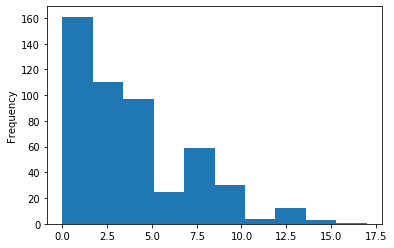

In [3]:
ser1 = diabetes['Pregnancies']
ser1.plot(kind='hist', stacked = True)

seems there is no missing data.

In [4]:
ser2 = diabetes['Glucose']
#pd.to_numeric(ser2).plot(kind='hist', stacked = True) 
ser2.eq("0").sum()
ser2.eq("\'\'").sum()
ser2.eq("MISS").sum()
ser2.eq("?").sum()
print('sum of Zeros:\n',ser2.eq("0").sum(),"\nsum of MISSES:\n",ser2.eq("MISS").sum()+ser2.eq("?").sum()+ser2.eq("\'\'").sum())

sum of Zeros:
 4 
sum of MISSES:
 3


glucose cant be zero so it got to be missing data.

while i wanted to run this code i got a error then i found out there is a missing data 

pd.to_numeric(ser2).plot(kind='hist', stacked = True) 

sum of Zeros:
 24


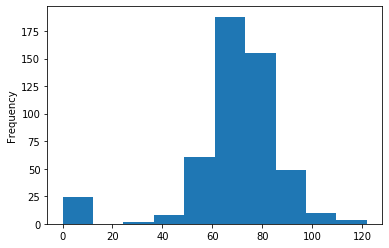

In [5]:
ser2 = diabetes['BloodPressure']
pd.to_numeric(ser2).plot(kind='hist', stacked = True) 
# ser2.eq("0").sum()
# ser2.eq("\'\'").sum()
# ser2.eq("MISS").sum()
# ser2.eq("?").sum()
print('sum of Zeros:\n',ser2.eq(0).sum())

blood pressure cant be zero so it got to be missing data.

In [6]:
ser2 = diabetes['SkinThickness']
#pd.to_numeric(ser2).plot(kind='hist', stacked = True) \
ser2.eq("0").sum()
ser2.eq("\'\'").sum()
ser2.eq("MISS").sum()
ser2.eq("?").sum()
print('sum of Zeros:\n',ser2.eq("0").sum(),"\nsum of MISSES:\n",ser2.eq("MISS").sum()+ser2.eq("\'\'").sum()+ser2.eq("?").sum())


sum of Zeros:
 142 
sum of MISSES:
 4


SkinThickness cant be zero so it got to be missing data.

while i wanted to run this code i got a error then i found out there is a missing data 

pd.to_numeric(ser2).plot(kind='hist', stacked = True) 

same stategy goes for others as well:

In [7]:
ser2 = diabetes['Insulin']
# pd.to_numeric(ser2).plot(kind='hist', stacked = True) 
ser2.eq("0").sum()
ser2.eq("\'\'").sum()
# ser2.eq("MISS").sum()
ser2.eq("?").sum()
print('sum of Zeros:\n',ser2.eq("0").sum(),"\nsum of MISSES:\n",ser2.eq("MISS").sum()+ser2.eq("\'\'").sum()+ser2.eq("?").sum())

sum of Zeros:
 239 
sum of MISSES:
 2


In [8]:
ser2 = diabetes['BMI']
# pd.to_numeric(ser2).plot(kind='hist', stacked = True) 
# ser2.eq("0").sum()
# ser2.eq("\'\'").sum()
ser2.eq("MISS").sum()
# ser2.eq("?").sum()
print('sum of Zeros:\n',ser2.eq("0").sum(),"\nsum of MISSES:\n",ser2.eq("MISS").sum()+ser2.eq("\'\'").sum())

sum of Zeros:
 0 
sum of MISSES:
 1


In [9]:
ser2 = diabetes['DiabetesPedigreeFunction']
# pd.to_numeric(ser2).plot(kind='hist', stacked = True) 
# ser2.eq("0").sum()
# ser2.eq("\'\'").sum()
ser2.eq("MISS").sum()
# ser2.eq("?").sum()
print('sum of Zeros:\n',ser2.eq("0").sum(),"\nsum of MISSES:\n",ser2.eq("MISS").sum()+ser2.eq("\'\'").sum())

sum of Zeros:
 0 
sum of MISSES:
 1


In [10]:
ser2 = diabetes['Age']
# pd.to_numeric(ser2).plot(kind='hist', stacked = True) 
# ser2.eq("0").sum()
# ser2.eq("\'\'").sum()
# ser2.eq("MISS").sum()
ser2.eq("?").sum()
print('sum of Zeros:\n',ser2.eq("0").sum(),"\nsum of MISSES:\n",ser2.eq("MISS").sum()+ser2.eq("\'\'").sum()+ser2.eq("?").sum())

sum of Zeros:
 0 
sum of MISSES:
 1


In [11]:
ser2 = diabetes['Outcome']
# pd.to_numeric(ser2).plot(kind='hist', stacked = True) 
# ser2.eq("0").sum()
ser2.eq("\'\'").sum()
ser2.eq("MISS").sum()
# ser2.eq("?").sum()
print("\nsum of MISSES:\n",ser2.eq("MISS").sum()+ser2.eq("\'\'").sum()+ser2.eq("?").sum())


sum of MISSES:
 4


# now lets replace them with NaN
pregnancies and outcome are allowed to have zeros

In [12]:
dia_01=diabetes.copy()
dia_01=dia_01.replace({"\'\'":np.NaN,"MISS":np.NaN,"?":np.NaN,"0":np.NaN,0:np.NaN})
dia_01["Pregnancies"]=diabetes['Pregnancies']
dia_01["Outcome"]=diabetes['Outcome']
dia_01['Outcome']=dia_01["Outcome"].replace({"\'\'":np.NaN,"MISS":np.NaN,"?":np.NaN})
dia_01

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
497,2,81.0,72.0,15.0,76.0,30.1,0.547,25.0,0
498,7,195.0,70.0,33.0,145.0,25.1,0.163,55.0,1
499,6,154.0,74.0,32.0,193.0,29.3,0.839,39.0,0
500,2,117.0,90.0,19.0,71.0,25.2,0.313,21.0,0


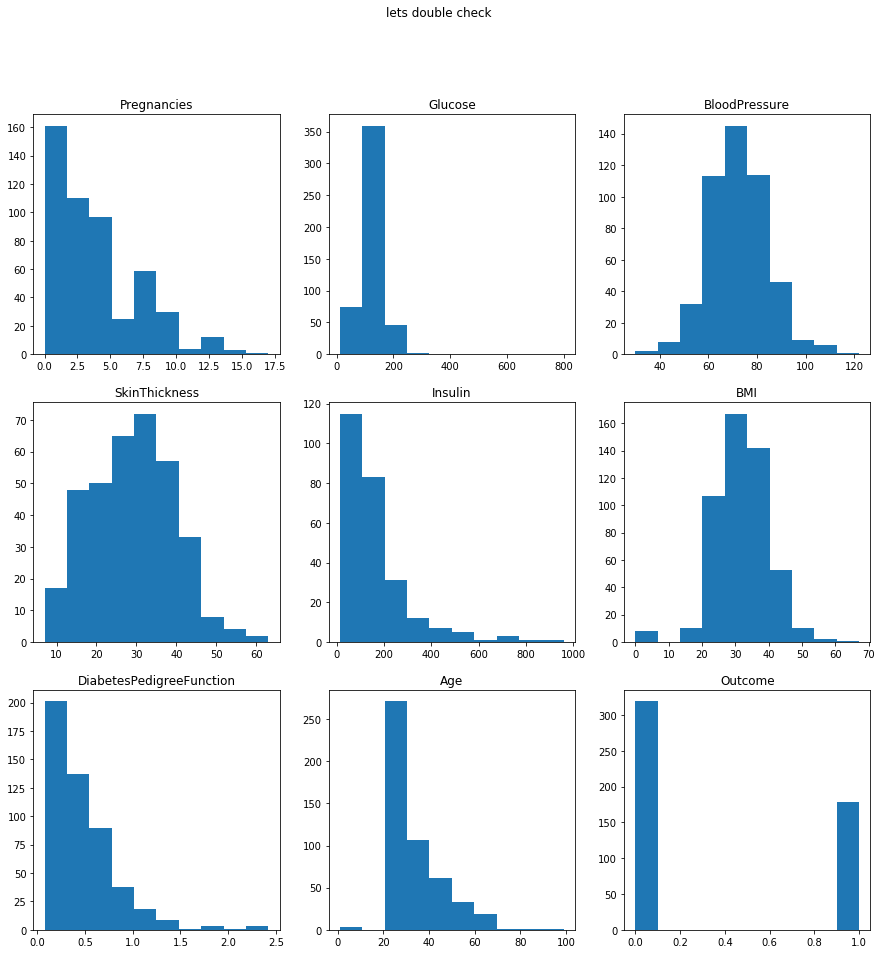

In [14]:
def plot_seris(dia_01):
    fig, axs = plt.subplots(3,3,figsize=(15,15))
    fig.suptitle('lets double check')
    axs[0,0].hist(dia_01.iloc[:,0])
    axs[0,0].set_title("Pregnancies")
    axs[0,1].hist(dia_01.iloc[:,1])
    axs[0,1].set_title("Glucose")
    axs[0,2].hist(dia_01.iloc[:,2])
    axs[0,2].set_title("BloodPressure")
    axs[1,0].hist(dia_01.iloc[:,3])
    axs[1,0].set_title("SkinThickness")
    axs[1,1].hist(dia_01.iloc[:,4])
    axs[1,1].set_title("Insulin")
    axs[1,2].hist(dia_01.iloc[:,5])
    axs[1,2].set_title("BMI")
    axs[2,0].hist(dia_01.iloc[:,6])
    axs[2,0].set_title("DiabetesPedigreeFunction")
    axs[2,1].hist(dia_01.iloc[:,7])
    axs[2,1].set_title("Age")
    axs[2,2].hist(pd.to_numeric(dia_01.iloc[:,8]))
    axs[2,2].set_title("Outcome")
    plt.show()
plot_seris(dia_01)

glucose may still have some missing data

In [15]:
print(pd.to_numeric(dia_01.iloc[:,1]).max())

800.0


In [16]:
dia_01['Glucose']=dia_01["Glucose"].replace({800:np.NaN})
dia_01['BMI']=dia_01["BMI"].replace({0:np.NaN})

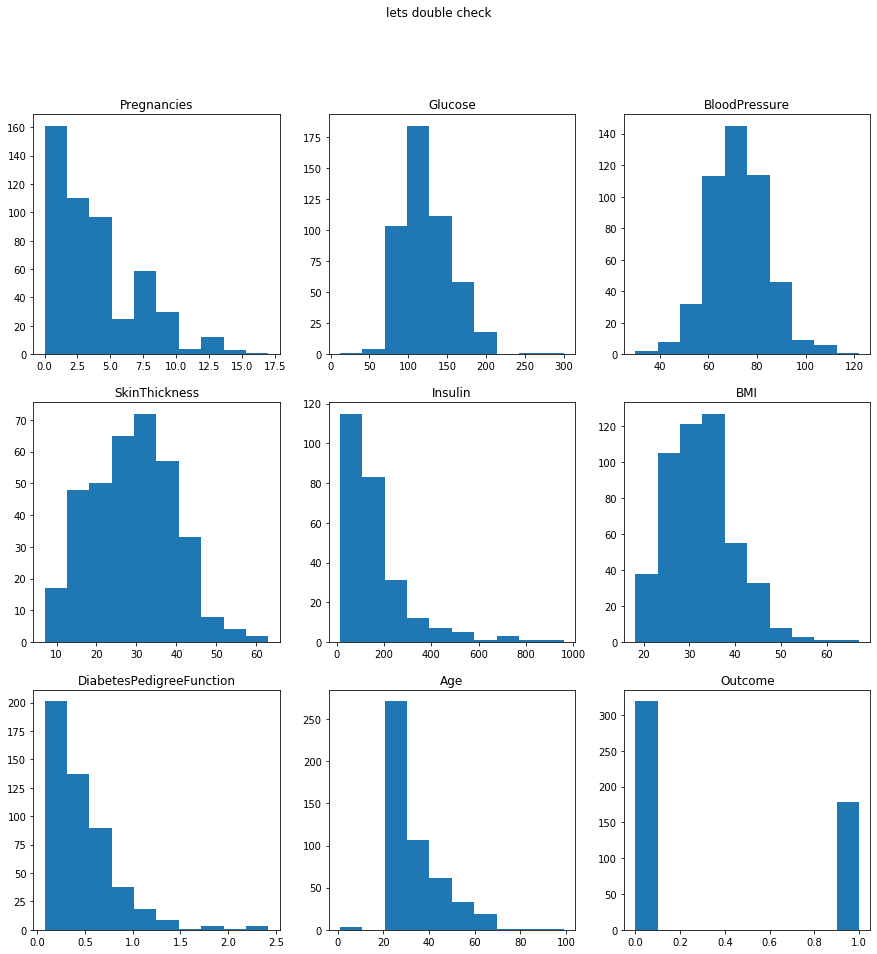

Pregnancies                  0.000
Glucose                     12.000
BloodPressure               30.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                          1.000
dtype: float64

In [17]:
plot_seris(dia_01)
dia_01.min()

it  seems we found the missing data throughly.

# Q3:

replace with 0

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
497     81.0
498    195.0
499    154.0
500    117.0
501     84.0
Name: Glucose, Length: 502, dtype: float64


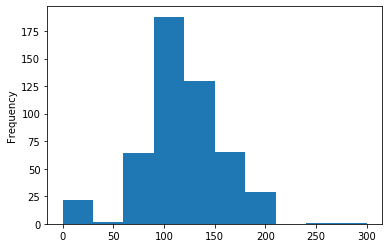

In [18]:
dia_02=dia_01.replace({np.NaN:0})
print(dia_02['Glucose'])
ser2 = dia_02['Glucose']
pd.to_numeric(ser2).plot(kind='hist', stacked = True) 

replace with max of each column

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
497     81.0
498    195.0
499    154.0
500    117.0
501     84.0
Name: Glucose, Length: 502, dtype: float64


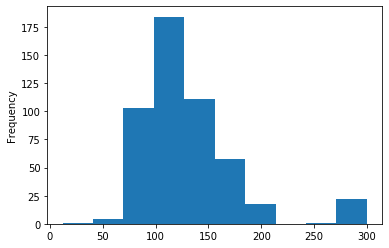

In [19]:
for s in dia_01:
    dia_02[s]=dia_01[s].replace({np.NaN:pd.to_numeric(dia_01[s]).max()})
print(dia_02['Glucose'])
ser2 = dia_02['Glucose']
pd.to_numeric(ser2).plot(kind='hist', stacked = True) 

replace with mean

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
497     81.0
498    195.0
499    154.0
500    117.0
501     84.0
Name: Glucose, Length: 502, dtype: float64


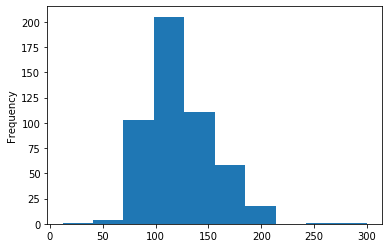

In [20]:
for s in dia_01:
    dia_02[s]=dia_01[s].replace({np.NaN:pd.to_numeric(dia_01[s]).mean()})
print(dia_02['Glucose'])
ser2 = dia_02['Glucose']
pd.to_numeric(ser2).plot(kind='hist', stacked = True) 


replace with mode

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
497     81.0
498    195.0
499    154.0
500    117.0
501     84.0
Name: Glucose, Length: 502, dtype: float64


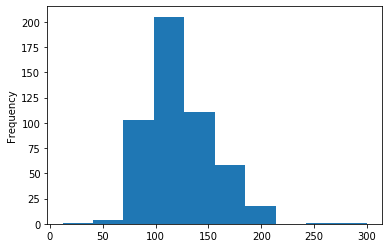

In [22]:
def my_mode(sample):
    c = Counter(sample)
    return [k for k, v in c.items() if v == c.most_common(1)[0][1]]
for s in dia_01:
    dia_02[s]=dia_01[s].replace({np.NaN:my_mode(pd.to_numeric(dia_01[s]))[0]})
print(dia_02['Glucose'])
ser2 = dia_02['Glucose']
pd.to_numeric(ser2).plot(kind='hist', stacked = True) 

to my oppinion its better to replace the NaN values with mean because of following reasons:

-if we replace it with a specific constant then the data will have so much dependecies on the costant values and also we  have to try hard to find the best constant value for it

-if we change it with a specific data from each column like max it will be similar to the preivious part

-think of series with  0 and 1 values and the number of ones is equal to number of zeros+1 , then if we have so many missing data and replace them with one the whole data direction will compromise.

-so i think the best way maybe is to replace them with mean.

## imputation:
One type of imputation algorithm is univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. impute.SimpleImputer). By contrast, multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values (e.g. impute.IterativeImputer).

Univariate feature imputation
The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.

 Multivariate feature imputation
A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

reference:https://scikit-learn.org/stable/modules/impute.html

In [23]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
dia_02=dia_01.copy()
dia_03=imp.fit_transform(dia_02)
print(imp.fit_transform(dia_02))


[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  6.    154.     74.    ...   0.839  39.      0.   ]
 [  2.    117.     90.    ...   0.313  21.      0.   ]
 [  3.     84.     72.    ...   0.267  28.      0.   ]]


# Q5:

In [62]:
def equifreq(arr1): 
      
    a = len(arr1) 
    n = int(a / 4) 
    li=[[],[],[],[]]
    for i in range(0, 4): 
        arr = [] 
        for j in range(i * n, (i + 1) * n): 
            if j >= a: 
                break
            arr = arr + [arr1[j]] 
        li[i]=arr
    return li
def my_iqr(s):
    outer=[[],[]]
    s=s.sort_values(ascending=True)
    iqs=equifreq(s.to_numpy())
    iqs=pd.DataFrame(iqs)
#     print(iqs)
    iq1=iqs[0].max()
    iq3=iqs[3].min()
    iqr=iq3-iq1
    outer[0]=s<(iq1-1.5*iqr)
    outer[1]=s>(iq3+1.5*iqr)
    return outer

In [70]:
dia_04=dia_03.copy()
for s in dia_04:
    print(s,':\n',my_iqr(dia_04[s]),'\n')


Pregnancies :
 [277     True
300     True
239     True
445     True
237     True
       ...  
323     True
298     True
455     True
88     False
159    False
Name: Pregnancies, Length: 502, dtype: bool, 277    True
300    True
239    True
445    True
237    True
       ... 
323    True
298    True
455    True
88     True
159    True
Name: Pregnancies, Length: 502, dtype: bool] 

Glucose :
 [384     True
62      True
146     True
352     True
76      True
       ...  
408     True
8       True
228     True
386     True
374    False
Name: Glucose, Length: 502, dtype: bool, 384    True
62     True
146    True
352    True
76     True
       ... 
408    True
8      True
228    True
386    True
374    True
Name: Glucose, Length: 502, dtype: bool] 

BloodPressure :
 [18     True
125    True
4      True
80     True
346    True
       ... 
84     True
362    True
43     True
177    True
106    True
Name: BloodPressure, Length: 502, dtype: bool, 18     True
125    True
4      True
80     True
3

In [76]:
z_scores = zscore(dia_04)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = dia_04[filtered_entries]

print(new_df)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6.0    148.0           72.0      35.000000  163.513514  33.6   
1            1.0     85.0           66.0      29.000000  163.513514  26.6   
2            8.0    183.0           64.0      28.904494  163.513514  23.3   
3            1.0     89.0           66.0      23.000000   94.000000  28.1   
5            5.0    116.0           74.0      28.904494  163.513514  25.6   
..           ...      ...            ...            ...         ...   ...   
497          2.0     81.0           72.0      15.000000   76.000000  30.1   
498          7.0    195.0           70.0      33.000000  145.000000  25.1   
499          6.0    154.0           74.0      32.000000  193.000000  29.3   
500          2.0    117.0           90.0      19.000000   71.000000  25.2   
501          3.0     84.0           72.0      32.000000  163.513514  37.2   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.62